# Key Indicators of Heart Disease: Lifestyle Indicators

## Data Collection and Setup

In [5]:
# dependencies and set up
import pandas as pd
from pathlib import Path
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [6]:
# create path from CSV
path = os.path.join("..","cleaned_data","heart_2022_no_nans.csv")
keyIndicators = pd.read_csv(path)
keyIndicators.head()   

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [7]:
rowCount1 = len(keyIndicators.index)
rowCount1

246022

In [8]:
lifestyleDF = keyIndicators.loc[:, ["HadHeartAttack","GeneralHealth","PhysicalActivities","SleepHours","SmokerStatus","ECigaretteUsage","AlcoholDrinkers"]]
lifestyleDF

,HadHeartAttack,GeneralHealth,PhysicalActivities,SleepHours,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
0,No,Very good,Yes,9.0,Former smoker,Never used e-cigarettes in my entire life,No
1,No,Very good,Yes,6.0,Former smoker,Never used e-cigarettes in my entire life,No
2,No,Very good,No,8.0,Former smoker,Never used e-cigarettes in my entire life,Yes
3,No,Fair,Yes,9.0,Never smoked,Never used e-cigarettes in my entire life,No
4,No,Good,Yes,5.0,Never smoked,Never used e-cigarettes in my entire life,No
...,...,...,...,...,...,...,...
246017,No,Very good,Yes,6.0,Never smoked,Never used e-cigarettes in my entire life,Yes
246018,No,Fair,Yes,7.0,Never smoked,Never used e-cigarettes in my entire life,No
246019,No,Good,Yes,7.0,Never smoked,Never used e-cigarettes in my entire life,Yes
246020,No,Excellent,Yes,7.0,Never smoked,Never used e-cigarettes in my entire life,No


## Heart Disease

In [10]:
lifestyleDF.head()

,HadHeartAttack,GeneralHealth,PhysicalActivities,SleepHours,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
0,No,Very good,Yes,9.0,Former smoker,Never used e-cigarettes in my entire life,No
1,No,Very good,Yes,6.0,Former smoker,Never used e-cigarettes in my entire life,No
2,No,Very good,No,8.0,Former smoker,Never used e-cigarettes in my entire life,Yes
3,No,Fair,Yes,9.0,Never smoked,Never used e-cigarettes in my entire life,No
4,No,Good,Yes,5.0,Never smoked,Never used e-cigarettes in my entire life,No


In [11]:
uniqueHD = lifestyleDF["HadHeartAttack"].unique()
uniqueHD

array(['No', 'Yes'], dtype=object)

In [12]:
countHD = lifestyleDF["HadHeartAttack"].value_counts()
countHD

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

In [13]:
rowCount = len(lifestyleDF.index)
rowCount

246022

In [14]:
# positive heart disese results
positiveHD = lifestyleDF.loc[(lifestyleDF['HadHeartAttack'] == 'Yes')]
positiveHD.head()

,HadHeartAttack,GeneralHealth,PhysicalActivities,SleepHours,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
7,Yes,Fair,Yes,8.0,Never smoked,Never used e-cigarettes in my entire life,No
12,Yes,Good,Yes,5.0,Current smoker - now smokes every day,Use them some days,No
34,Yes,Good,Yes,6.0,Former smoker,Not at all (right now),No
37,Yes,Good,Yes,5.0,Former smoker,Never used e-cigarettes in my entire life,No
43,Yes,Good,Yes,8.0,Never smoked,Never used e-cigarettes in my entire life,No


In [15]:
posRowCount = len(positiveHD.index)
posRowCount

13435

In [16]:
# negative heart disease results
negativeHD = lifestyleDF.loc[(lifestyleDF['HadHeartAttack'] == 'No')]
negativeHD.head()

,HadHeartAttack,GeneralHealth,PhysicalActivities,SleepHours,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
0,No,Very good,Yes,9.0,Former smoker,Never used e-cigarettes in my entire life,No
1,No,Very good,Yes,6.0,Former smoker,Never used e-cigarettes in my entire life,No
2,No,Very good,No,8.0,Former smoker,Never used e-cigarettes in my entire life,Yes
3,No,Fair,Yes,9.0,Never smoked,Never used e-cigarettes in my entire life,No
4,No,Good,Yes,5.0,Never smoked,Never used e-cigarettes in my entire life,No


In [17]:
negRowCount = len(negativeHD.index)
negRowCount

232587

## General Health Stats

In [19]:
# general health status of participants WITH heart diease

In [20]:
positiveHD.head()

,HadHeartAttack,GeneralHealth,PhysicalActivities,SleepHours,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
7,Yes,Fair,Yes,8.0,Never smoked,Never used e-cigarettes in my entire life,No
12,Yes,Good,Yes,5.0,Current smoker - now smokes every day,Use them some days,No
34,Yes,Good,Yes,6.0,Former smoker,Not at all (right now),No
37,Yes,Good,Yes,5.0,Former smoker,Never used e-cigarettes in my entire life,No
43,Yes,Good,Yes,8.0,Never smoked,Never used e-cigarettes in my entire life,No


In [21]:
positiveHD[["HadHeartAttack", "GeneralHealth"]].head()

,HadHeartAttack,GeneralHealth
7,Yes,Fair
12,Yes,Good
34,Yes,Good
37,Yes,Good
43,Yes,Good


In [22]:
uniqueGH = positiveHD["GeneralHealth"].unique()
uniqueGH

array(['Fair', 'Good', 'Very good', 'Poor', 'Excellent'], dtype=object)

In [23]:
countGHpos = positiveHD["GeneralHealth"].value_counts()
countGHpos

GeneralHealth
Good         4599
Fair         3748
Very good    2470
Poor         2024
Excellent     594
Name: count, dtype: int64

In [24]:
# percentage of 'excellent' health responses from participants with heart disease
excelGHcount = positiveHD[(positiveHD["GeneralHealth"] == 'Excellent')].count()["HadHeartAttack"]
excelGHpercent = excelGHcount / float(posRowCount) * 100
excelGHpercent

4.421287681429103

In [25]:
# percentage of 'poor' health responses from participants with heart disease
poorGHPosCount = positiveHD[(positiveHD["GeneralHealth"] == 'Poor')].count()["HadHeartAttack"]
poorGHPosPercent = poorGHPosCount / float(posRowCount) * 100
poorGHPosPercent

15.065128395980649

In [26]:
# visualization of participants' general health WITH heart disease
participants = [2470, 4599, 594, 3748, 2024]
x_axis = np.arange(len(participants))

<BarContainer object of 5 artists>

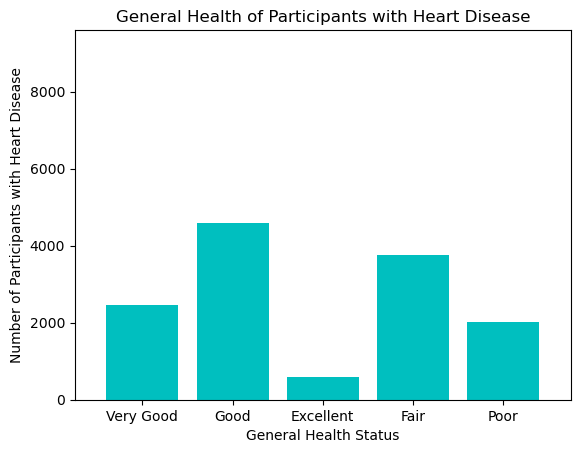

In [27]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Very Good", "Good", "Excellent", "Fair", "Poor"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(participants)+5000)
plt.title("General Health of Participants with Heart Disease")
plt.xlabel("General Health Status")
plt.ylabel("Number of Participants with Heart Disease")
plt.bar(x_axis, participants, color="c", align="center")

In [28]:
# general health status of participants WITHOUT heart diease

In [29]:
negativeHD.head()

,HadHeartAttack,GeneralHealth,PhysicalActivities,SleepHours,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
0,No,Very good,Yes,9.0,Former smoker,Never used e-cigarettes in my entire life,No
1,No,Very good,Yes,6.0,Former smoker,Never used e-cigarettes in my entire life,No
2,No,Very good,No,8.0,Former smoker,Never used e-cigarettes in my entire life,Yes
3,No,Fair,Yes,9.0,Never smoked,Never used e-cigarettes in my entire life,No
4,No,Good,Yes,5.0,Never smoked,Never used e-cigarettes in my entire life,No


In [30]:
negativeHD[["HadHeartAttack", "GeneralHealth"]].head()

,HadHeartAttack,GeneralHealth
0,No,Very good
1,No,Very good
2,No,Very good
3,No,Fair
4,No,Good


In [31]:
countGHneg = negativeHD["GeneralHealth"].value_counts()
countGHneg

GeneralHealth
Very good    84529
Good         72810
Excellent    40931
Fair         26911
Poor          7406
Name: count, dtype: int64

In [32]:
# percentage of 'excellent' health responses from participants without heart disease
excelGHNegCount = negativeHD[(negativeHD["GeneralHealth"] == 'Excellent')].count()["HadHeartAttack"]
excelGHNegPercent = excelGHNegCount / float(negRowCount) * 100
excelGHNegPercent

17.598146070072705

In [33]:
# percentage of 'poor' health responses from participants without heart disease
poorGHNegCount = negativeHD[(negativeHD["GeneralHealth"] == 'Poor')].count()["HadHeartAttack"]
poorGHNegPercent = poorGHNegCount / float(negRowCount) * 100
poorGHNegPercent

3.184184842661026

In [34]:
# visualization of participants' general health WITHOUT heart disease
participants = [84529, 72810, 40931, 26911, 7406]
x_axis = np.arange(len(participants))

<BarContainer object of 5 artists>

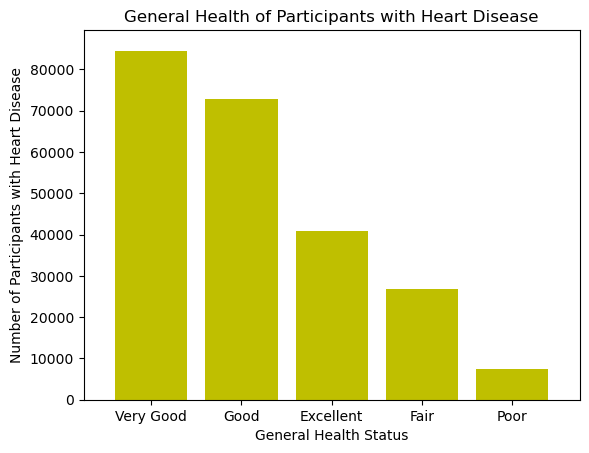

In [35]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Very Good", "Good", "Excellent", "Fair", "Poor"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(participants)+5000)
plt.title("General Health of Participants with Heart Disease")
plt.xlabel("General Health Status")
plt.ylabel("Number of Participants with Heart Disease")
plt.bar(x_axis, participants, color="y", align="center")

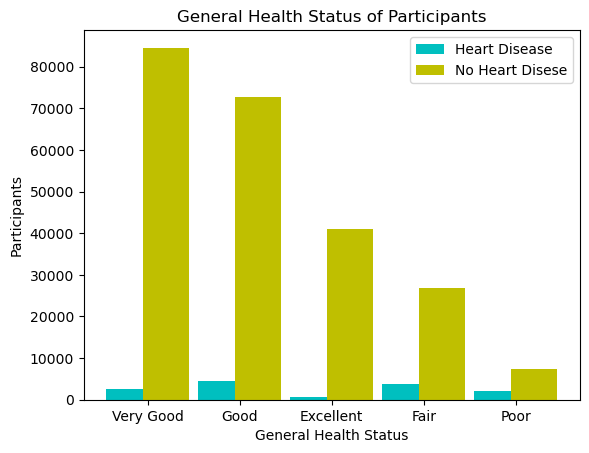

In [36]:
# comparison of general health status for those with and without heart disease
status = ["Very Good", "Good", "Excellent", "Fair", "Poor"] 
Ypos = [2470, 4599, 594, 3748, 2024]
Zneg = [84529, 72810, 40931, 26911, 7406] 
  
X_axis = np.arange(len(status)) 
  
plt.bar(X_axis - 0.2, Ypos, 0.5, color="c", label = "Heart Disease") 
plt.bar(X_axis + 0.2, Zneg, 0.5, color="y", label = "No Heart Disese") 
  
plt.xticks(X_axis, ["Very Good", "Good", "Excellent", "Fair", "Poor"])
plt.xlabel("General Health Status") 
plt.ylabel("Participants") 
plt.title("General Health Status of Participants") 
plt.legend() 
plt.show() 

## Physical Activity

In [38]:
# physical activity status of participants WITH heart diease
positiveHD.head()

,HadHeartAttack,GeneralHealth,PhysicalActivities,SleepHours,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
7,Yes,Fair,Yes,8.0,Never smoked,Never used e-cigarettes in my entire life,No
12,Yes,Good,Yes,5.0,Current smoker - now smokes every day,Use them some days,No
34,Yes,Good,Yes,6.0,Former smoker,Not at all (right now),No
37,Yes,Good,Yes,5.0,Former smoker,Never used e-cigarettes in my entire life,No
43,Yes,Good,Yes,8.0,Never smoked,Never used e-cigarettes in my entire life,No


In [39]:
positiveHD[["HadHeartAttack", "PhysicalActivities"]].head()

,HadHeartAttack,PhysicalActivities
7,Yes,Yes
12,Yes,Yes
34,Yes,Yes
37,Yes,Yes
43,Yes,Yes


In [40]:
uniquePA = positiveHD["PhysicalActivities"].unique()
uniquePA

array(['Yes', 'No'], dtype=object)

In [41]:
countPA = positiveHD["PhysicalActivities"].value_counts()
countPA

PhysicalActivities
Yes    8514
No     4921
Name: count, dtype: int64

In [42]:
rowCount = len(positiveHD.index)
rowCount

13435

In [43]:
posPApercentYes = 8514/13435 *100
posPApercentNo = 4912/13435 *100
print(posPApercentYes)
print(posPApercentNo)

63.371790100483814
36.56122069222181


In [44]:
# percentage of 'physically active' responses from participants with heart disease
activePosCount = positiveHD[(positiveHD["PhysicalActivities"] == 'Yes')].count()["HadHeartAttack"]
activePosPercent = activePosCount / float(posRowCount) * 100
activePosPercent

63.371790100483814

In [45]:
# percentage of 'not physically active' responses from participants with heart disease
notActivePosCount = positiveHD[(positiveHD["PhysicalActivities"] == 'No')].count()["HadHeartAttack"]
notActivePosPercent = notActivePosCount / float(posRowCount) * 100
notActivePosPercent

36.62820989951619

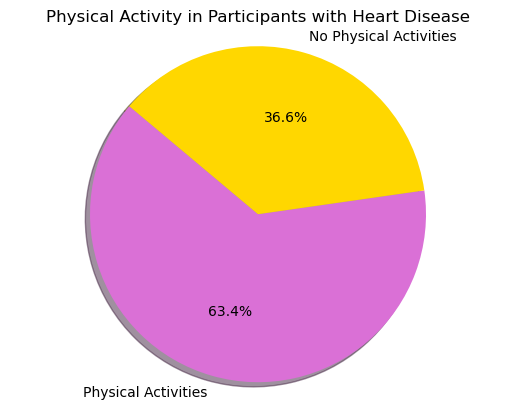

In [46]:
# visualization of participants WITH heart disease and corresponding physical activity status
labels = ["Physical Activities", "No Physical Activities"]
sizes = [8514, 4921]
colors = ["orchid", "gold"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Physical Activity in Participants with Heart Disease")
plt.show()

In [47]:
# physical status of participants WITHOUT heart diease
negativeHD.head()

,HadHeartAttack,GeneralHealth,PhysicalActivities,SleepHours,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
0,No,Very good,Yes,9.0,Former smoker,Never used e-cigarettes in my entire life,No
1,No,Very good,Yes,6.0,Former smoker,Never used e-cigarettes in my entire life,No
2,No,Very good,No,8.0,Former smoker,Never used e-cigarettes in my entire life,Yes
3,No,Fair,Yes,9.0,Never smoked,Never used e-cigarettes in my entire life,No
4,No,Good,Yes,5.0,Never smoked,Never used e-cigarettes in my entire life,No


In [48]:
negativeHD[["HadHeartAttack", "PhysicalActivities"]].head()

,HadHeartAttack,PhysicalActivities
0,No,Yes
1,No,Yes
2,No,No
3,No,Yes
4,No,Yes


In [49]:
uniquePA = positiveHD["PhysicalActivities"].unique()
uniquePA

array(['Yes', 'No'], dtype=object)

In [50]:
countPA = negativeHD["PhysicalActivities"].value_counts()
countPA

PhysicalActivities
Yes    182804
No      49783
Name: count, dtype: int64

In [51]:
# percentage of 'physically active' responses from participants without heart disease
activeNegCount = negativeHD[(negativeHD["PhysicalActivities"] == 'Yes')].count()["HadHeartAttack"]
activeNegPercent = activeNegCount / float(negRowCount) * 100
activeNegPercent

78.59596624058955

In [52]:
# percentage of 'not physically active' responses from participants without heart disease
notActiveNegCount = negativeHD[(negativeHD["PhysicalActivities"] == 'No')].count()["HadHeartAttack"]
notActiveNegPercent = notActiveNegCount / float(negRowCount) * 100
notActiveNegPercent

21.404033759410456

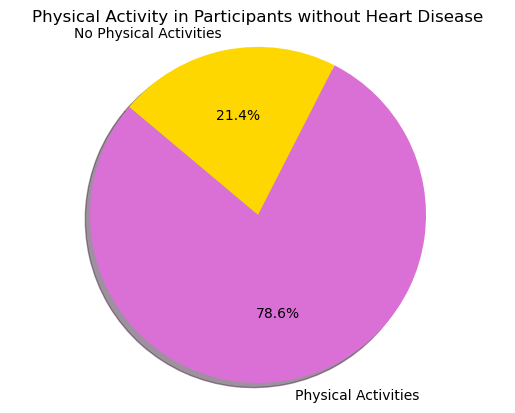

In [53]:
# visualization of participants WITHOUT heart disease and corresponding physical activity status
labels = ["Physical Activities", "No Physical Activities"]
sizes = [182804, 49783]
colors = ["orchid", "gold"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Physical Activity in Participants without Heart Disease")
plt.show()

## Sleep

In [55]:
# the hours of sleep per night for participants WITH heart disease
positiveHD.head()

,HadHeartAttack,GeneralHealth,PhysicalActivities,SleepHours,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
7,Yes,Fair,Yes,8.0,Never smoked,Never used e-cigarettes in my entire life,No
12,Yes,Good,Yes,5.0,Current smoker - now smokes every day,Use them some days,No
34,Yes,Good,Yes,6.0,Former smoker,Not at all (right now),No
37,Yes,Good,Yes,5.0,Former smoker,Never used e-cigarettes in my entire life,No
43,Yes,Good,Yes,8.0,Never smoked,Never used e-cigarettes in my entire life,No


In [56]:
positiveHD[["HadHeartAttack","SleepHours"]].head()

,HadHeartAttack,SleepHours
7,Yes,8.0
12,Yes,5.0
34,Yes,6.0
37,Yes,5.0
43,Yes,8.0


In [57]:
uniqueSleep = positiveHD["SleepHours"].unique()
uniqueSleep

array([ 8.,  5.,  6., 10., 12.,  9.,  4.,  7.,  3.,  2., 14., 18.,  1.,
       15., 11., 23., 13., 20., 16., 17., 19., 22.])

In [58]:
countSH = positiveHD["SleepHours"].value_counts()
countSH

SleepHours
8.0     3815
7.0     2926
6.0     2831
5.0     1116
9.0      797
4.0      695
10.0     593
3.0      193
12.0     190
2.0       91
1.0       43
11.0      38
15.0      24
16.0      24
14.0      21
13.0      15
18.0      11
20.0       6
17.0       2
22.0       2
23.0       1
19.0       1
Name: count, dtype: int64

In [59]:
posSleepHours = pd.DataFrame(positiveHD["SleepHours"])
posSleepHours

,SleepHours
7,8.0
12,5.0
34,6.0
37,5.0
43,8.0
...,...
245922,6.0
245943,8.0
246012,4.0
246016,6.0


In [60]:
# Establish the bins.
hour_bins = [0, 5, 10, 24]
labels = ["0-5 hours", "6-10 hours", "11-24 hours"]

In [61]:
pd.cut(positiveHD["SleepHours"], hour_bins, labels=labels)

7         6-10 hours
12         0-5 hours
34        6-10 hours
37         0-5 hours
43        6-10 hours
             ...    
245922    6-10 hours
245943    6-10 hours
246012     0-5 hours
246016    6-10 hours
246021     0-5 hours
Name: SleepHours, Length: 13435, dtype: category
Categories (3, object): ['0-5 hours' < '6-10 hours' < '11-24 hours']

In [62]:
posSleepHours["Hours Slept"] = pd.cut(posSleepHours["SleepHours"], hour_bins, labels=labels)
posSleepHours

,SleepHours,Hours Slept
7,8.0,6-10 hours
12,5.0,0-5 hours
34,6.0,6-10 hours
37,5.0,0-5 hours
43,8.0,6-10 hours
...,...,...
245922,6.0,6-10 hours
245943,8.0,6-10 hours
246012,4.0,0-5 hours
246016,6.0,6-10 hours


In [63]:
posHoursSlept = posSleepHours.groupby("Hours Slept")
posHoursSlept["Hours Slept"].count()

Hours Slept
0-5 hours       2138
6-10 hours     10962
11-24 hours      335
Name: Hours Slept, dtype: int64

In [64]:
# percentage of '0-5 hours slept' in participants with heart disease
lowSleepPosCount = posSleepHours[(posSleepHours["Hours Slept"] == "0-5 hours")].count()["SleepHours"]
lowSleepPosPercent = lowSleepPosCount / float(posRowCount) * 100
lowSleepPosPercent

15.913658355042799

In [65]:
# percentage of '6-10 hours slept' in participants with heart disease
midSleepPosCount = posSleepHours[(posSleepHours["Hours Slept"] == "6-10 hours")].count()["SleepHours"]
midSleepPosPercent = midSleepPosCount / float(posRowCount) * 100
midSleepPosPercent

81.59285448455526

In [66]:
# percentage of '11-24 hours slept' in participants with heart disease
highSleepPosCount = posSleepHours[(posSleepHours["Hours Slept"] == "11-24 hours")].count()["SleepHours"]
highSleepPosPercent = highSleepPosCount / float(posRowCount) * 100
highSleepPosPercent

2.4934871604019353

In [67]:
# visualization of sleep status for those WITH heart disease
sleepHours = ["0-5 hours", "6-10 hours", "11-24 hours"]
partResponse = [2138, 10962, 335]
x_axis = np.arange(len(partResponse))

<BarContainer object of 3 artists>

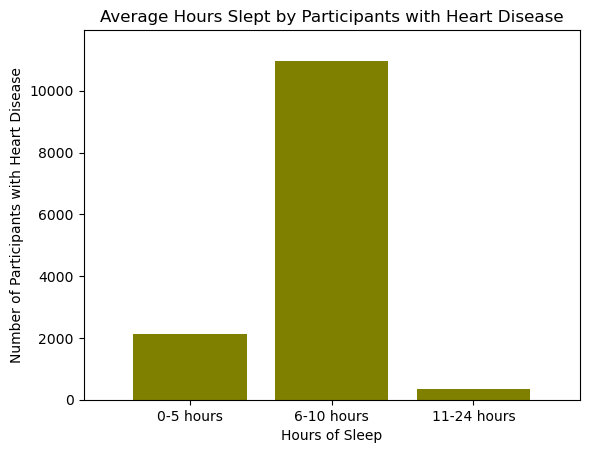

In [68]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, sleepHours)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(partResponse)+1000)
plt.title("Average Hours Slept by Participants with Heart Disease")
plt.xlabel("Hours of Sleep")
plt.ylabel("Number of Participants with Heart Disease")
plt.bar(x_axis, partResponse, color="olive", align="center")

In [69]:
# the hours of sleep per night for participants WITHOUT heart disease
negativeHD.head()

,HadHeartAttack,GeneralHealth,PhysicalActivities,SleepHours,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
0,No,Very good,Yes,9.0,Former smoker,Never used e-cigarettes in my entire life,No
1,No,Very good,Yes,6.0,Former smoker,Never used e-cigarettes in my entire life,No
2,No,Very good,No,8.0,Former smoker,Never used e-cigarettes in my entire life,Yes
3,No,Fair,Yes,9.0,Never smoked,Never used e-cigarettes in my entire life,No
4,No,Good,Yes,5.0,Never smoked,Never used e-cigarettes in my entire life,No


In [70]:
negativeHD[["HadHeartAttack", "SleepHours"]].head()

,HadHeartAttack,SleepHours
0,No,9.0
1,No,6.0
2,No,8.0
3,No,9.0
4,No,5.0


In [71]:
negativeHD["SleepHours"].head()

0    9.0
1    6.0
2    8.0
3    9.0
4    5.0
Name: SleepHours, dtype: float64

In [72]:
countSH = negativeHD["SleepHours"].value_counts()
countSH

SleepHours
7.0     73521
8.0     66112
6.0     51150
5.0     15301
9.0     11062
4.0      5783
10.0     4875
3.0      1425
12.0     1286
2.0       649
1.0       520
11.0      301
16.0      131
15.0      130
14.0      127
18.0       72
13.0       64
20.0       44
24.0       13
17.0        9
23.0        5
19.0        4
22.0        3
Name: count, dtype: int64

In [73]:
negSleepHours = pd.DataFrame(negativeHD["SleepHours"])
negSleepHours

,SleepHours
0,9.0
1,6.0
2,8.0
3,9.0
4,5.0
...,...
246015,7.0
246017,6.0
246018,7.0
246019,7.0


In [74]:
# Establish the bins.
hour_bins = [0, 5, 10, 24]
labels = ["0-5 hours", "6-10 hours", "11-24 hours"]

In [75]:
pd.cut(negativeHD["SleepHours"], hour_bins, labels=labels)

0         6-10 hours
1         6-10 hours
2         6-10 hours
3         6-10 hours
4          0-5 hours
             ...    
246015    6-10 hours
246017    6-10 hours
246018    6-10 hours
246019    6-10 hours
246020    6-10 hours
Name: SleepHours, Length: 232587, dtype: category
Categories (3, object): ['0-5 hours' < '6-10 hours' < '11-24 hours']

In [76]:
negSleepHours["Hours Slept"] = pd.cut(negSleepHours["SleepHours"], hour_bins, labels=labels)
negSleepHours

,SleepHours,Hours Slept
0,9.0,6-10 hours
1,6.0,6-10 hours
2,8.0,6-10 hours
3,9.0,6-10 hours
4,5.0,0-5 hours
...,...,...
246015,7.0,6-10 hours
246017,6.0,6-10 hours
246018,7.0,6-10 hours
246019,7.0,6-10 hours


In [77]:
negHoursSlept = negSleepHours.groupby("Hours Slept")
negHoursSlept["Hours Slept"].count()

Hours Slept
0-5 hours       23678
6-10 hours     206720
11-24 hours      2189
Name: Hours Slept, dtype: int64

In [78]:
# percentage of '0-5 hours slept' in participants with heart disease
lowSleepNegCount = negSleepHours[(negSleepHours["Hours Slept"] == "0-5 hours")].count()["SleepHours"]
lowSleepNegPercent = lowSleepNegCount / float(negRowCount) * 100
lowSleepNegPercent

10.180276627670507

In [79]:
# percentage of '6-10 hours slept' in participants with heart disease
midSleepNegCount = negSleepHours[(negSleepHours["Hours Slept"] == "6-10 hours")].count()["SleepHours"]
midSleepNegPercent = midSleepNegCount / float(negRowCount) * 100
midSleepNegPercent

88.87857016944197

In [80]:
# percentage of '11-24 hours slept' in participants with heart disease
highSleepNegCount = negSleepHours[(negSleepHours["Hours Slept"] == "11-24 hours")].count()["SleepHours"]
highSleepNegPercent = highSleepNegCount / float(negRowCount) * 100
highSleepNegPercent

0.9411532028875217

In [81]:
sleepHours = ["0-5 hours", "6-10 hours", "11-24 hours"]
partResponse = [23678, 206720, 2189]
x_axis = np.arange(len(partResponse))

<BarContainer object of 3 artists>

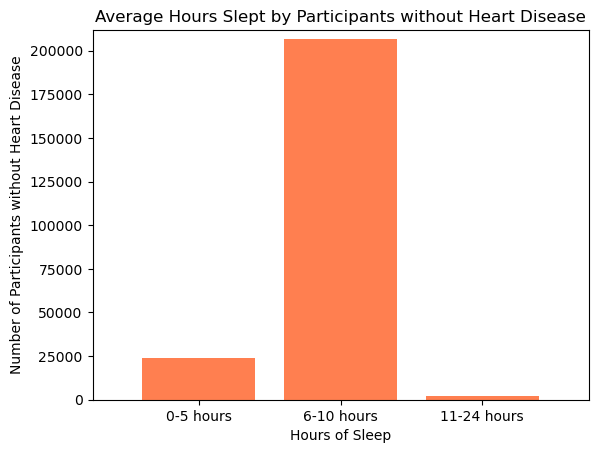

In [82]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, sleepHours)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(partResponse)+5000)
plt.title("Average Hours Slept by Participants without Heart Disease")
plt.xlabel("Hours of Sleep")
plt.ylabel("Number of Participants without Heart Disease")
plt.bar(x_axis, partResponse, color="coral", align="center")

## Smoking & E-Cigarettes Use

In [84]:
# smoking status of participants WITH heart diease
positiveHD.head()

,HadHeartAttack,GeneralHealth,PhysicalActivities,SleepHours,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
7,Yes,Fair,Yes,8.0,Never smoked,Never used e-cigarettes in my entire life,No
12,Yes,Good,Yes,5.0,Current smoker - now smokes every day,Use them some days,No
34,Yes,Good,Yes,6.0,Former smoker,Not at all (right now),No
37,Yes,Good,Yes,5.0,Former smoker,Never used e-cigarettes in my entire life,No
43,Yes,Good,Yes,8.0,Never smoked,Never used e-cigarettes in my entire life,No


In [85]:
positiveHD[["HadHeartAttack", "SmokerStatus","ECigaretteUsage"]].head()

,HadHeartAttack,SmokerStatus,ECigaretteUsage
7,Yes,Never smoked,Never used e-cigarettes in my entire life
12,Yes,Current smoker - now smokes every day,Use them some days
34,Yes,Former smoker,Not at all (right now)
37,Yes,Former smoker,Never used e-cigarettes in my entire life
43,Yes,Never smoked,Never used e-cigarettes in my entire life


In [86]:
# smoking status

In [87]:
uniqueSmoke = positiveHD["SmokerStatus"].unique()
uniqueSmoke

array(['Never smoked', 'Current smoker - now smokes every day',
       'Former smoker', 'Current smoker - now smokes some days'],
      dtype=object)

In [88]:
countSmokePos = positiveHD["SmokerStatus"].value_counts()
countSmokePos

SmokerStatus
Former smoker                            5610
Never smoked                             5471
Current smoker - now smokes every day    1801
Current smoker - now smokes some days     553
Name: count, dtype: int64

In [89]:
positiveHD["SmokerStatus"] = positiveHD["SmokerStatus"].replace({"Current smoker - now smokes every day":"Current Daily Smoker", "Current smoker - now smokes some days":"Current Occassional Smoker"})

In [90]:
positiveHD["SmokerStatus"].value_counts()

SmokerStatus
Former smoker                 5610
Never smoked                  5471
Current Daily Smoker          1801
Current Occassional Smoker     553
Name: count, dtype: int64

In [91]:
countSmokeNeg = negativeHD["SmokerStatus"].value_counts()
countSmokeNeg

SmokerStatus
Never smoked                             142266
Former smoker                             62917
Current smoker - now smokes every day     19858
Current smoker - now smokes some days      7546
Name: count, dtype: int64

In [92]:
negativeHD["SmokerStatus"] = negativeHD["SmokerStatus"].replace({"Current smoker - now smokes every day":"Current Daily Smoker", "Current smoker - now smokes some days":"Current Occassional Smoker"})

In [93]:
negativeHD["SmokerStatus"].value_counts()

SmokerStatus
Never smoked                  142266
Former smoker                  62917
Current Daily Smoker           19858
Current Occassional Smoker      7546
Name: count, dtype: int64

In [94]:
# percentage of 'never smoked' responses from participants with heart disease
neverPosCount = positiveHD[(positiveHD["SmokerStatus"] == 'Never smoked')].count()["HadHeartAttack"]
neverPosPercent = neverPosCount / float(posRowCount) * 100
neverPosPercent

40.72199478972832

In [95]:
# percentage of 'current daily smoker' responses from participants with heart disease
currentPosCount = positiveHD[(positiveHD["SmokerStatus"] == 'Current Daily Smoker')].count()["HadHeartAttack"]
currentPosPercent = currentPosCount / float(posRowCount) * 100
currentPosPercent

13.405284704131

In [96]:
# percentage of 'never smoked' responses from participants without heart disease
neverNegCount = negativeHD[(negativeHD["SmokerStatus"] == 'Never smoked')].count()["HadHeartAttack"]
neverNegPercent = neverNegCount / float(negRowCount) * 100
neverNegPercent

61.166789201460105

In [97]:
# percentage of 'current daily smoker' responses from participants without heart disease
currentNegCount = negativeHD[(negativeHD["SmokerStatus"] == 'Current Daily Smoker')].count()["HadHeartAttack"]
currentNegPercent = currentNegCount / float(negRowCount) * 100
currentNegPercent

8.537880449036274

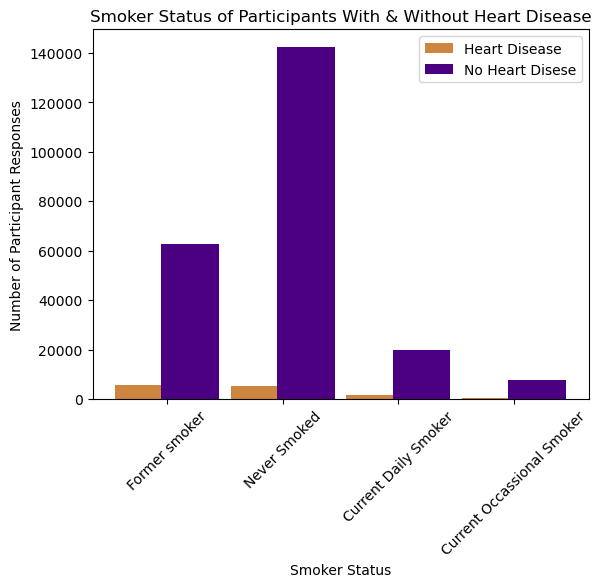

In [98]:
# visualization of smoker status in participants WITH and WITHOUT heart disease
status = ["Former smoker", "Never Smoked", "Current Daily Smoker", "Current Occassional Smoker"]
Ypos = [5610,  5471,  1801,  553] 
Zneg = [62617, 142266, 19858, 7546] 
  
X_axis = np.arange(len(status)) 
  
plt.bar(X_axis - 0.2, Ypos, 0.5, color="peru", label = "Heart Disease") 
plt.bar(X_axis + 0.2, Zneg, 0.5, color="indigo", label = "No Heart Disese") 

tick_locations = [value for value in x_axis]
plt.xticks(X_axis, ["Former smoker", "Never Smoked", "Current Daily Smoker", "Current Occassional Smoker"], rotation=45)
plt.xlabel("Smoker Status") 
plt.ylabel("Number of Participant Responses") 
plt.title("Smoker Status of Participants With & Without Heart Disease") 
plt.legend() 
plt.show() 

In [99]:
# e-cigarette usage status

In [100]:
uniqueECig = positiveHD["ECigaretteUsage"].unique()
uniqueECig

array(['Never used e-cigarettes in my entire life', 'Use them some days',
       'Not at all (right now)', 'Use them every day'], dtype=object)

In [101]:
countECigPos = positiveHD["ECigaretteUsage"].value_counts()
countECigPos

ECigaretteUsage
Never used e-cigarettes in my entire life    10572
Not at all (right now)                        2435
Use them some days                             251
Use them every day                             177
Name: count, dtype: int64

In [102]:
positiveHD["ECigaretteUsage"] = positiveHD["ECigaretteUsage"].replace({"Never used e-cigarettes in my entire life":"Never Used", "Use them some days":"Occasional User", "Not at all (right now)":"Not Current User", "Use them every day":"Daily User"})

In [103]:
positiveHD["ECigaretteUsage"].value_counts()

ECigaretteUsage
Never Used          10572
Not Current User     2435
Occasional User       251
Daily User            177
Name: count, dtype: int64

In [104]:
countECigNeg = negativeHD["ECigaretteUsage"].value_counts()
countECigNeg

ECigaretteUsage
Never used e-cigarettes in my entire life    179556
Not at all (right now)                        40846
Use them some days                             6407
Use them every day                             5778
Name: count, dtype: int64

In [105]:
negativeHD["ECigaretteUsage"] = negativeHD["ECigaretteUsage"].replace({"Never used e-cigarettes in my entire life":"Never Used", "Use them some days":"Occasional User", "Not at all (right now)":"Not Current User", "Use them every day":"Daily User"})

In [106]:
negativeHD["ECigaretteUsage"].value_counts()

ECigaretteUsage
Never Used          179556
Not Current User     40846
Occasional User       6407
Daily User            5778
Name: count, dtype: int64

In [107]:
# percentage of 'never used' responses from participants with heart disease
neverEcigPosCount = positiveHD[(positiveHD["ECigaretteUsage"] == 'Never Used')].count()["HadHeartAttack"]
neverEcigPosPercent = neverEcigPosCount / float(posRowCount) * 100
neverEcigPosPercent

78.68998883513211

In [108]:
# percentage of 'daily user' responses from participants with heart disease
dailyPosCount = positiveHD[(positiveHD["ECigaretteUsage"] == 'Daily User')].count()["HadHeartAttack"]
dailyPosPercent = dailyPosCount / float(posRowCount) * 100
dailyPosPercent

1.3174544101228136

In [109]:
# percentage of 'never used' responses from participants without heart disease
neverEcigNegCount = negativeHD[(negativeHD["ECigaretteUsage"] == 'Never Used')].count()["HadHeartAttack"]
neverEcigNegPercent = neverEcigNegCount / float(negRowCount) * 100
neverEcigNegPercent

77.19949954210682

In [110]:
# percentage of 'current daily user' responses from participants without heart disease
dailyNegCount = negativeHD[(negativeHD["ECigaretteUsage"] == 'Daily User')].count()["HadHeartAttack"]
dailyNegPercent = dailyNegCount / float(negRowCount) * 100
dailyNegPercent

2.4842317068451805

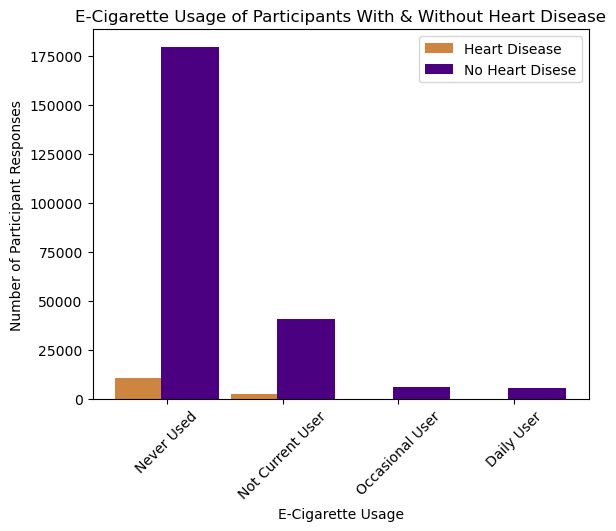

In [111]:
# visualization of smoker status in participants WITH and WITHOUT heart disease
status = ["Never Used", "Not Current User", "Occasional User", "Daily User"]
Ypos = [10572, 2435, 251, 177] 
Zneg = [179556, 40846, 6407, 5778] 
  
X_axis = np.arange(len(status)) 
  
plt.bar(X_axis - 0.2, Ypos, 0.5, color="peru", label = "Heart Disease") 
plt.bar(X_axis + 0.2, Zneg, 0.5, color="indigo", label = "No Heart Disese") 
  
plt.xticks(X_axis, ["Never Used", "Not Current User", "Occasional User", "Daily User"], rotation=45) 
plt.xlabel("E-Cigarette Usage") 
plt.ylabel("Number of Participant Responses") 
plt.title("E-Cigarette Usage of Participants With & Without Heart Disease") 
plt.legend() 
plt.show() 

## Alcohol Consumption

In [113]:
# smoking status of participants WITH heart diease
positiveHD.head()

,HadHeartAttack,GeneralHealth,PhysicalActivities,SleepHours,SmokerStatus,ECigaretteUsage,AlcoholDrinkers
7,Yes,Fair,Yes,8.0,Never smoked,Never Used,No
12,Yes,Good,Yes,5.0,Current Daily Smoker,Occasional User,No
34,Yes,Good,Yes,6.0,Former smoker,Not Current User,No
37,Yes,Good,Yes,5.0,Former smoker,Never Used,No
43,Yes,Good,Yes,8.0,Never smoked,Never Used,No


In [114]:
positiveHD[["HadHeartAttack","AlcoholDrinkers"]].head()

,HadHeartAttack,AlcoholDrinkers
7,Yes,No
12,Yes,No
34,Yes,No
37,Yes,No
43,Yes,No


In [115]:
uniqueAU = positiveHD["AlcoholDrinkers"].unique()
uniqueAU

array(['No', 'Yes'], dtype=object)

In [116]:
countAUPos = positiveHD["AlcoholDrinkers"].value_counts()
countAUPos

AlcoholDrinkers
No     8109
Yes    5326
Name: count, dtype: int64

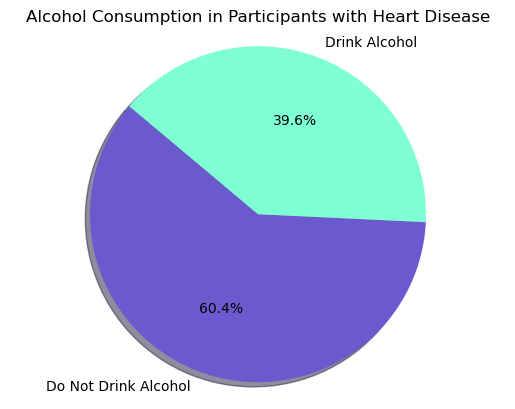

In [117]:
# create visualization of the percentage of participants's alcohol usage WITH heart disease
labels = ["Do Not Drink Alcohol", "Drink Alcohol"]
sizes = [8109, 5326]
colors = ["slateblue", "aquamarine"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Alcohol Consumption in Participants with Heart Disease")
plt.show()

In [118]:
countAUNeg = negativeHD["AlcoholDrinkers"].value_counts()
countAUNeg

AlcoholDrinkers
Yes    129981
No     102606
Name: count, dtype: int64

In [119]:
# percentage of participants who drink alcohol with heart disease
drinkPosCount = positiveHD[(positiveHD["AlcoholDrinkers"] == 'Yes')].count()["HadHeartAttack"]
drinkPosPercent = drinkPosCount / float(posRowCount) * 100
drinkPosPercent

39.6427242277633

In [120]:
# percentage of participants who do not drink alcohol with heart disease
noDrinkPosCount = positiveHD[(positiveHD["AlcoholDrinkers"] == 'No')].count()["HadHeartAttack"]
noDrinkPosPercent = noDrinkPosCount / float(posRowCount) * 100
noDrinkPosPercent

60.3572757722367

In [121]:
# percentage of participants who drink alcohol without heart disease
drinkNegCount = negativeHD[(negativeHD["AlcoholDrinkers"] == 'Yes')].count()["HadHeartAttack"]
drinkNegPercent = drinkNegCount / float(negRowCount) * 100
drinkNegPercent

55.884894684569645

In [122]:
# percentage of participants who do not drink alcohol without heart disease
noDrinkNegCount = negativeHD[(negativeHD["AlcoholDrinkers"] == 'No')].count()["HadHeartAttack"]
noDrinkNegPercent = noDrinkNegCount / float(negRowCount) * 100
noDrinkNegPercent

44.115105315430355

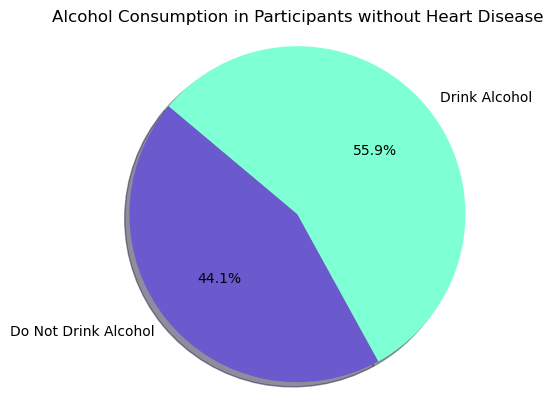

In [123]:
# create visualization of the percentage of participants's alcohol usage WITHOUT heart disease
labels = ["Do Not Drink Alcohol", "Drink Alcohol"]
sizes = [102606, 129981]
colors = ["slateblue", "aquamarine"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Alcohol Consumption in Participants without Heart Disease")
plt.show()

# Summary

## Lifestyle Indicators in Participants with Heart Disease 

In [126]:
positiveLifestyleSummary = pd.DataFrame(
    {
     "Total with Heart Disease": [posRowCount],
     "% in 'Excellent' Health": [excelGHpercent],
     "% in 'Poor' Health": [poorGHPosPercent],
     "% Active": [activePosPercent],
     "% Not Active": [notActivePosPercent],
     "% Slept 0-5 hours": [lowSleepPosPercent],
     "% Slept 6-10 hours": [midSleepPosPercent],
     "% Slept Over 10 Hours": [highSleepPosPercent],
     "% Never Smoked": [neverPosPercent],
     "% Current Smoker": [currentPosPercent],
     "% Never Used": [neverEcigPosPercent],
     "% Daily User": [dailyPosPercent],
     "% Drink Alcohol": [drinkPosPercent],
     "% Do Not Drink Alcohol": [noDrinkPosPercent]
    }
)

# Formatting
positiveLifestyleSummary["Total with Heart Disease"] = positiveLifestyleSummary["Total with Heart Disease"].map("{:,.0f}".format)
positiveLifestyleSummary["% in 'Excellent' Health"] = positiveLifestyleSummary["% in 'Excellent' Health"].map("{:.2f}%".format)
positiveLifestyleSummary["% in 'Poor' Health"] = positiveLifestyleSummary["% in 'Poor' Health"].map("{:.2f}%".format)
positiveLifestyleSummary["% Active"] = positiveLifestyleSummary["% Active"].map("{:.2f}%".format)
positiveLifestyleSummary["% Not Active"] = positiveLifestyleSummary["% Not Active"].map("{:.2f}%".format)
positiveLifestyleSummary["% Slept 0-5 hours"] = positiveLifestyleSummary["% Slept 0-5 hours"].map("{:.2f}%".format)
positiveLifestyleSummary["% Slept 6-10 hours"] = positiveLifestyleSummary["% Slept 6-10 hours"].map("{:.2f}%".format)
positiveLifestyleSummary["% Slept Over 10 Hours"] = positiveLifestyleSummary["% Slept Over 10 Hours"].map("{:.2f}%".format)
positiveLifestyleSummary["% Never Smoked"] = positiveLifestyleSummary["% Never Smoked"].map("{:.2f}%".format)
positiveLifestyleSummary["% Current Smoker"] = positiveLifestyleSummary["% Current Smoker"].map("{:.2f}%".format)
positiveLifestyleSummary["% Never Used"] = positiveLifestyleSummary["% Never Used"].map("{:.2f}%".format)
positiveLifestyleSummary["% Daily User"] = positiveLifestyleSummary["% Daily User"].map("{:.2f}%".format)
positiveLifestyleSummary["% Drink Alcohol"] = positiveLifestyleSummary["% Drink Alcohol"].map("{:.2f}%".format)
positiveLifestyleSummary["% Do Not Drink Alcohol"] = positiveLifestyleSummary["% Do Not Drink Alcohol"].map("{:.2f}%".format)   

positiveLifestyleSummary

,Total with Heart Disease,% in 'Excellent' Health,% in 'Poor' Health,% Active,% Not Active,% Slept 0-5 hours,% Slept 6-10 hours,% Slept Over 10 Hours,% Never Smoked,% Current Smoker,% Never Used,% Daily User,% Drink Alcohol,% Do Not Drink Alcohol
0,"13,435",4.42%,15.07%,63.37%,36.63%,15.91%,81.59%,2.49%,40.72%,13.41%,78.69%,1.32%,39.64%,60.36%


## Lifestyle Indicators in Participants without Heart Disease 

In [128]:
negativeLifestyleSummary = pd.DataFrame(
    {
        "Total without Heart Disease": [negRowCount],
        "% in 'Excellent' Health": [excelGHNegPercent],
        "% in 'Poor' Health": [poorGHNegPercent],
        "% Active": [activeNegPercent],
        "% Not Active": [notActiveNegPercent],
        "% Slept 0-5 hours": [lowSleepNegPercent],
        "% Slept 6-10 hours": [midSleepNegPercent],
        "% Slept Over 10 Hours": [highSleepNegPercent],
        "% Never Smoked": [neverNegPercent],
        "% Current Smoker": [currentNegPercent],
        "% Never Used": [neverEcigNegPercent],
        "% Daily User": [dailyNegPercent],
        "% Drink Alcohol": [drinkNegPercent],
        "% Do Not Drink Alcohol": [noDrinkNegPercent]
    }
)
negativeLifestyleSummary["Total without Heart Disease"] = negativeLifestyleSummary["Total without Heart Disease"].map("{:,.0f}".format)
negativeLifestyleSummary["% in 'Excellent' Health"] = negativeLifestyleSummary["% in 'Excellent' Health"].map("{:.2f}%".format)
negativeLifestyleSummary["% in 'Poor' Health"] = negativeLifestyleSummary["% in 'Poor' Health"].map("{:.2f}%".format)
negativeLifestyleSummary["% Active"] = negativeLifestyleSummary["% Active"].map("{:.2f}%".format)
negativeLifestyleSummary["% Not Active"] = negativeLifestyleSummary["% Not Active"].map("{:.2f}%".format)
negativeLifestyleSummary["% Slept 0-5 hours"] = negativeLifestyleSummary["% Slept 0-5 hours"].map("{:.2f}%".format)
negativeLifestyleSummary["% Slept 6-10 hours"] = negativeLifestyleSummary["% Slept 6-10 hours"].map("{:.2f}%".format)
negativeLifestyleSummary["% Slept Over 10 Hours"] = negativeLifestyleSummary["% Slept Over 10 Hours"].map("{:.2f}%".format)
negativeLifestyleSummary["% Never Smoked"] = negativeLifestyleSummary["% Never Smoked"].map("{:.2f}%".format)
negativeLifestyleSummary["% Current Smoker"] = negativeLifestyleSummary["% Current Smoker"].map("{:.2f}%".format)
negativeLifestyleSummary["% Never Used"] = negativeLifestyleSummary["% Never Used"].map("{:.2f}%".format)
negativeLifestyleSummary["% Daily User"] = negativeLifestyleSummary["% Daily User"].map("{:.2f}%".format)
negativeLifestyleSummary["% Drink Alcohol"] = negativeLifestyleSummary["% Drink Alcohol"].map("{:.2f}%".format)
negativeLifestyleSummary["% Do Not Drink Alcohol"] = negativeLifestyleSummary["% Do Not Drink Alcohol"].map("{:.2f}%".format)   

negativeLifestyleSummary

,Total without Heart Disease,% in 'Excellent' Health,% in 'Poor' Health,% Active,% Not Active,% Slept 0-5 hours,% Slept 6-10 hours,% Slept Over 10 Hours,% Never Smoked,% Current Smoker,% Never Used,% Daily User,% Drink Alcohol,% Do Not Drink Alcohol
0,"232,587",17.60%,3.18%,78.60%,21.40%,10.18%,88.88%,0.94%,61.17%,8.54%,77.20%,2.48%,55.88%,44.12%


## Summary

##### Of the 246,022 individuals in the study, 5.47% had heart disease and 94.54% did not have heart disease.
#### General Health:
##### Individuals without heart disease reported to be in ‘excellent’ general health nearly 4 times (3.98) more than individuals with heart disease. 
##### Individuals with heart disease reported to be in ‘poor’ general health nearly 5 times (4.74) more than individuals without heart disease.
#### Physical Activity:
##### Overall, individuals without heart disease were 15.23% more active than individuals with heart disease.
#### Sleep:
##### A majority of the individuals reported sleeping between 6-10 hours, followed by 0-5 hours, and the lowest percentage of individuals sleeping over 10 hours. The most reported sleep hours were 7 and 8 for both groups of participants.
#### Smoking & E-Cigarette Use:
##### The percentage of individuals with heart disease that never smoked cigarettes was lower than the percentage of individuals without heart disease that never smoked cigarettes. The percentage of current smokers was higher in individuals with heart disease.
##### The percentage of individuals who have never used e-cigarettes was greater in those with heart disease by 1.49%.  Daily e-cigarette users were 1.16% less in individuals with heart disease than those without heart disease.
#### Alcohol Consumption:
##### 39.64% of individuals with heart disease reported drinking alcohol while 60.36% reported they did not consume alcohol.  55.88% of individuals without heart disease reported drinking alcohol while 44.12% reported they did not consume alcohol. 
